<a href="https://colab.research.google.com/github/TokyoYoshida/GoogleColab/blob/master/%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E7%94%A8%E7%AB%B6%E9%A6%AC%E3%83%87%E3%83%BC%E3%82%BF%E4%BD%9C%E6%88%90_and_%E3%83%A9%E3%83%B3%E3%82%BF%E3%82%99%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88_%E7%AB%B6%E9%A6%AC%E4%BA%88%E6%83%B3_random_forest_keiba20200528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# 必要ならば以下のようにディレクトリ移動する
 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
%cd /content/drive/'My Drive'/'★個人専用ファイル'/'開発用・個人サービス開発'/'GoogleColab'/

/content/drive/My Drive/★個人専用ファイル/開発用・個人サービス開発/GoogleColab


In [0]:
from sklearn import preprocessing
from sklearn import ensemble
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト回帰用


In [0]:
from matplotlib import pyplot as plt

In [0]:
%matplotlib inline

In [0]:
# 100列までは省略しない
pd.set_option('display.max_columns', 100)

In [0]:
x = [[1],[1],[2],[2],[3]]
y = [[100,200],[100,200],[200,300],[200,300],[300,400]]



In [0]:
rf = ensemble.RandomForestClassifier()


In [21]:

rf.fit(x, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
t = [[2]]

In [0]:
py = rf.predict(t)

In [24]:
py

array([[200, 300]])

In [0]:
# dat = pd.read_csv("/Users/tokyoyoshida/Documents/private/keiba/keiba_data_2017/result.csv",names=["rank","frame_num","horse_num","name","sex","age","amount","jockey","time","diff_arrival","odds","popularity","weight","diff_weight","trainer","race_num","grade","ground","direction","unknown","distance","weather","condition","start_time","year","month","day"],

In [0]:
dat = pd.read_csv("./data/keiba/result_20200528_2020年時点最新競馬データ.csv",names=["rank","frame_num","horse_num","name","sex","age","amount","jockey","time","diff_arrival","odds","popularity","weight","diff_weight","trainer","race_num","grade","ground","direction","unknown","distance","weather","condition","start_time","year","month","day"],
                )

In [0]:
dat["rank"] = pd.to_numeric(dat["rank"],errors='coerce')
dat["frame_num"] = pd.to_numeric(dat["frame_num"],errors='coerce')
dat["horse_num"] = pd.to_numeric(dat["horse_num"],errors='coerce')
dat["age"] = pd.to_numeric(dat["age"],errors='coerce')
dat["odds"] = pd.to_numeric(dat["odds"],errors='coerce')
dat["popularity"] = pd.to_numeric(dat["popularity"],errors='coerce')
dat["weight"] = pd.to_numeric(dat["weight"],errors='coerce')
dat["diff_weight"] = pd.to_numeric(dat["diff_weight"],errors='coerce')
dat["race_num"] = pd.to_numeric(dat["race_num"],errors='coerce')
dat["grade"] = pd.to_numeric(dat["grade"],errors='coerce')
dat["distance"] = pd.to_numeric(dat["distance"],errors='coerce')
dat["year"] = pd.to_numeric(dat["year"],errors='coerce')
dat["month"] = pd.to_numeric(dat["month"],errors='coerce')
dat["day"] = pd.to_numeric(dat["day"],errors='coerce')



In [0]:
dat["diff_arrival"] = dat["diff_arrival"].fillna("")

In [0]:
dat["winner"] = dat.apply(lambda x: x["rank"] == 1, axis = 1)
dat["return"] = 0
dat.loc[dat["winner"] == True,"return"] = dat.query("winner == True")["odds"]

In [0]:
# factor化
dat["name"] ,name = pd.factorize(dat["name"])
dat["sex"] ,sex = pd.factorize(dat["sex"])
dat["jockey"] ,jockey = pd.factorize(dat["jockey"])
dat["diff_arrival"] ,diff_arrival = pd.factorize(dat["diff_arrival"])
dat["trainer"] ,trainer = pd.factorize(dat["trainer"])
dat["ground"] ,ground = pd.factorize(dat["ground"])
dat["direction"] ,direction = pd.factorize(dat["direction"])
dat["weather"] ,weather = pd.factorize(dat["weather"])
dat["condition"] ,condition = pd.factorize(dat["condition"])


In [0]:
dat["ymd"] = dat["year"]*10000 + dat["month"]*100 + dat["day"]

In [0]:
# ダウンサンプリング

In [0]:
winners = dat.query("winner == True").dropna()
losers = dat.query("winner != True").dropna()

In [0]:
datlen = min(len(winners), len(losers))

In [0]:
train_test_per = 0.5
train_len = int(datlen * train_test_per)
test_len = datlen-train_len
train = pd.concat([winners.head(train_len),losers.head(train_len)])
test = pd.concat([winners.tail(test_len),losers.tail(test_len)])

In [0]:
# ダウンサンプリング終わり

In [0]:
#ランダムフォレストによる予想

In [40]:
tmp = df.sample(10)

NameError: ignored

In [0]:
rf.fit(train[["odds"]],train[["winner"]])

In [0]:
# 正答率
rf.score(test[["odds"]],test[["winner"]])

In [0]:
#ランダムフォレストによる予想終わり

In [0]:
# 穴馬バイアスの分析

In [0]:
dat.groupby("popularity").mean()

In [0]:
# 穴馬バイアスの分析終わり

In [0]:
# 若い馬バイアスの分析

In [0]:
dat.groupby("age").mean()

In [0]:
# 若い馬バイアスの分析終わり

In [0]:
# グレードバイアスの分析

In [0]:
dat.groupby("grade").mean()

In [0]:
# グレードバイアスの分析終わり

In [0]:
# 穴馬　、若い馬、グレードの組み合わせバイアスの分析

In [0]:
tmp = dat.query("grade == 3 and age == 5 and popularity == 6")

In [0]:
tmp.describe()

In [0]:
dat.sample(10000).mean()

In [0]:
#dat.mean()

In [0]:
# 穴馬　、若い馬、グレードの組み合わせバイアスの分析　終わり

In [0]:
# おいしさ指数の作成 ランダムフォレスト線形回帰を使う

In [0]:
## 前回成績を列に加える

In [0]:
g_count = 0

In [0]:
def set_prev_race(dat,onedata):
    global g_count
    g_count = g_count + 1
    if (g_count % 10000) == 0:
        print(g_count)
    tmp = onedata.copy()
#     print(tmp["name"])
    prev_df = dat[(dat["name"] == tmp["name"]) & (dat["ymd"]  < tmp["ymd"])].sort_values("ymd",ascending=False).head(1)
    if len(prev_df) > 0:
        prev = prev_df.iloc[0]
        for c in tmp.index:
            tmp["prev_"+c] = prev[c]
#     print(tmp)
    return tmp

In [44]:
res = dat.apply(lambda x: set_prev_race(dat, x), axis = 1)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000


In [0]:
#res.to_csv("keiba/keiba_dat_res_20190611.csv")

In [0]:
#res.to_pickle("keiba/keiba_dat_res_20190611.pkl")

In [0]:
res.to_pickle("./data/keiba/keiba_dat_res_20200528.pkl")

In [47]:
res

,age,amount,condition,day,diff_arrival,diff_weight,direction,distance,frame_num,grade,ground,horse_num,jockey,month,name,odds,popularity,prev_age,prev_amount,prev_condition,prev_day,prev_diff_arrival,prev_diff_weight,prev_direction,prev_distance,prev_frame_num,prev_grade,prev_ground,prev_horse_num,prev_jockey,prev_month,prev_name,prev_odds,prev_popularity,prev_race_num,prev_rank,prev_return,prev_sex,prev_start_time,prev_time,prev_trainer,prev_unknown,prev_weather,prev_weight,prev_winner,prev_year,prev_ymd,race_num,rank,return,sex,start_time,time,trainer,unknown,weather,weight,winner,year,ymd
0,5,52.0,0,17,0,14.0,0,1200.0,3,9,0,5,0,3,0,23.1,8.0,4.0,55.0,0.0,3.0,15.0,4.0,1.0,1400.0,4.0,9.0,0.0,7.0,87.0,11.0,0.0,85.0,12.0,8.0,13.0,0.0,0.0,14:05,1:26.1,0.0,-,1.0,462.0,False,2018.0,20181103.0,7,1.0,23.1,0,13:10,1:12.9,0,-,0,476.0,True,2019,20190317
1,5,55.0,0,17,1,8.0,0,1200.0,7,9,0,13,1,3,1,16.0,7.0,4.0,53.0,3.0,12.0,15.0,4.0,1.0,1000.0,6.0,9.0,0.0,7.0,15.0,8.0,1.0,5.2,3.0,6.0,6.0,0.0,0.0,12:40,0:58.7,8.0,-,1.0,432.0,False,2018.0,20180812.0,7,2.0,0.0,0,13:10,1:13.4,1,-,0,440.0,False,2019,20190317
2,4,52.0,0,17,2,2.0,0,1200.0,4,9,0,7,2,3,2,10.5,5.0,4.0,54.0,0.0,26.0,14.0,0.0,1.0,1400.0,5.0,9.0,0.0,6.0,37.0,1.0,2.0,16.9,6.0,6.0,7.0,0.0,0.0,12:50,1:26.9,2.0,-,1.0,472.0,False,2019.0,20190126.0,7,3.0,0.0,0,13:10,1:13.4,2,-,0,474.0,False,2019,20190317
3,4,55.0,0,17,3,6.0,0,1200.0,6,9,0,11,3,3,3,14.8,6.0,3.0,53.0,0.0,13.0,10.0,8.0,1.0,1200.0,3.0,9.0,0.0,6.0,55.0,10.0,3.0,3.3,2.0,6.0,10.0,0.0,0.0,12:55,1:13.6,3.0,-,1.0,468.0,False,2018.0,20181013.0,7,4.0,0.0,0,13:10,1:13.5,3,-,0,474.0,False,2019,20190317
4,5,55.0,0,17,4,-2.0,0,1200.0,4,9,0,8,4,3,4,143.8,14.0,5.0,52.0,1.0,3.0,4.0,0.0,1.0,1200.0,6.0,9.0,0.0,9.0,125.0,2.0,4.0,111.4,13.0,7.0,10.0,0.0,0.0,13:20,1:13.8,4.0,-,0.0,468.0,False,2019.0,20190203.0,7,5.0,0.0,0,13:10,1:13.5,4,-,0,466.0,False,2019,20190317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661567,5,57.0,0,5,5,-2.0,1,2000.0,8,9,1,13,134,3,9203,58.6,9.0,5.0,57.0,0.0,25.0,6.0,-2.0,1.0,2000.0,1.0,9.0,1.0,1.0,119.0,2.0,9203.0,23.3,8.0,9.0,8.0,0.0,1.0,14:15,2:01.9,176.0,-,1.0,470.0,False,2017.0,20170225.0,12,9.0,0.0,1,16:01,2:02.1,176,-,0,468.0,False,2017,20170305
661568,5,57.0,0,5,2,-2.0,1,2000.0,5,9,1,6,159,3,61278,140.9,12.0,5.0,57.0,0.0,19.0,2.0,-4.0,1.0,2000.0,1.0,9.0,1.0,1.0,159.0,2.0,61278.0,113.1,10.0,10.0,8.0,0.0,1.0,14:40,2:01.3,89.0,-,1.0,496.0,False,2017.0,20170219.0,12,10.0,0.0,1,16:01,2:02.2,89,-,0,494.0,False,2017,20170305
661569,5,57.0,0,5,6,2.0,1,2000.0,5,9,1,7,14,3,11049,14.3,6.0,5.0,54.0,0.0,25.0,3.0,-4.0,1.0,2000.0,5.0,9.0,1.0,5.0,14.0,2.0,11049.0,19.5,6.0,9.0,2.0,0.0,1.0,14:15,2:01.3,54.0,-,1.0,494.0,False,2017.0,20170225.0,12,11.0,0.0,1,16:01,2:02.3,54,-,0,496.0,False,2017,20170305
661570,4,55.0,0,5,10,-4.0,1,2000.0,4,9,1,5,146,3,67506,174.9,13.0,4.0,54.0,0.0,26.0,15.0,1.0,1.0,2000.0,3.0,9.0,1.0,3.0,75.0,2.0,67506.0,61.0,10.0,10.0,8.0,0.0,0.0,14:50,2:03.0,158.0,-,1.0,464.0,False,2017.0,20170226.0,12,12.0,0.0,0,16:01,2:02.6,158,-,0,460.0,False,2017,20170305


In [0]:
pd.show_versions()

In [0]:
#res = pd.read_pickle("/Users/tokyomac/Documents/tmp/keiba_data_2017/keiba_dat_res_20190611.pkl")

In [0]:
res

,age,amount,condition,day,diff_arrival,diff_weight,direction,distance,frame_num,grade,ground,horse_num,jockey,month,name,odds,popularity,prev_age,prev_amount,prev_condition,prev_day,prev_diff_arrival,prev_diff_weight,prev_direction,prev_distance,prev_frame_num,prev_grade,prev_ground,prev_horse_num,prev_jockey,prev_month,prev_name,prev_odds,prev_popularity,prev_race_num,prev_rank,prev_return,prev_sex,prev_start_time,prev_time,prev_trainer,prev_unknown,prev_weather,prev_weight,prev_winner,prev_year,prev_ymd,race_num,rank,return,sex,start_time,time,trainer,unknown,weather,weight,winner,year,ymd
0,2,54.0,0,12,0,0.0,0,1500.0,6,9,0,6,0,8,0,3.2,1.0,2.0,51.0,0.0,29.0,1.0,-2.0,0.0,1200.0,6.0,9.0,0.0,6.0,75.0,7.0,0.0,9.6,3.0,1.0,3.0,0.0,0.0,10:40,1:12.2,0.0,-,1.0,474.0,False,2006.0,20060729.0,1,1.0,3.2,0,10:40,1:31.6,0,-,0,474.0,True,2006,20060812
1,2,54.0,0,12,1,-8.0,0,1500.0,7,9,0,8,1,8,1,6.4,4.0,2.0,54.0,1.0,23.0,18.0,0.0,0.0,1800.0,1.0,9.0,0.0,1.0,1.0,7.0,1.0,26.9,7.0,4.0,3.0,0.0,1.0,12:30,1:57.7,1.0,-,1.0,456.0,False,2006.0,20060723.0,1,2.0,0.0,1,10:40,1:31.6,1,-,0,448.0,False,2006,20060812
2,2,54.0,0,12,2,0.0,0,1500.0,7,9,0,7,2,8,2,4.3,3.0,2.0,54.0,0.0,30.0,1.0,-8.0,0.0,1200.0,1.0,9.0,0.0,1.0,2.0,7.0,2.0,6.7,3.0,1.0,4.0,0.0,1.0,10:40,1:12.5,2.0,-,1.0,476.0,False,2006.0,20060730.0,1,3.0,0.0,1,10:40,1:31.9,2,-,0,476.0,False,2006,20060812
3,2,51.0,0,12,3,0.0,0,1500.0,2,9,0,2,3,8,3,33.1,7.0,2.0,51.0,2.0,2.0,7.0,0.0,0.0,1800.0,1.0,9.0,0.0,1.0,3.0,7.0,3.0,11.9,5.0,5.0,12.0,0.0,1.0,12:20,1:57.3,3.0,-,2.0,484.0,False,2006.0,20060702.0,1,4.0,0.0,1,10:40,1:32.1,3,-,0,484.0,False,2006,20060812
4,2,54.0,0,12,1,6.0,0,1500.0,5,9,0,5,4,8,4,3.9,2.0,2.0,54.0,0.0,30.0,9.0,-2.0,0.0,1200.0,2.0,9.0,0.0,2.0,15.0,7.0,4.0,6.6,2.0,1.0,3.0,0.0,1.0,10:40,1:12.5,4.0,-,1.0,512.0,False,2006.0,20060730.0,1,5.0,0.0,1,10:40,1:32.1,4,-,0,518.0,False,2006,20060812
5,2,54.0,0,12,4,2.0,0,1500.0,3,9,0,3,5,8,5,8.2,5.0,2.0,54.0,0.0,30.0,9.0,0.0,0.0,1200.0,3.0,9.0,0.0,3.0,73.0,7.0,5.0,42.4,8.0,4.0,6.0,0.0,1.0,12:30,1:14.6,5.0,-,1.0,464.0,False,2006.0,20060730.0,1,6.0,0.0,1,10:40,1:32.2,5,-,0,466.0,False,2006,20060812
6,2,53.0,0,12,5,8.0,0,1500.0,8,9,0,10,6,8,6,77.4,10.0,2.0,53.0,0.0,22.0,1.0,0.0,0.0,1200.0,8.0,9.0,0.0,8.0,6.0,7.0,6.0,50.6,7.0,4.0,7.0,0.0,1.0,12:30,1:13.4,6.0,-,2.0,436.0,False,2006.0,20060722.0,1,7.0,0.0,1,10:40,1:33.0,6,-,0,444.0,False,2006,20060812
7,2,54.0,0,12,3,0.0,0,1500.0,8,9,0,9,7,8,7,53.4,9.0,2.0,54.0,0.0,9.0,3.0,0.0,0.0,1800.0,5.0,9.0,0.0,7.0,7.0,7.0,7.0,123.4,11.0,5.0,12.0,0.0,1.0,11:50,1:56.5,7.0,-,1.0,442.0,False,2006.0,20060709.0,1,8.0,0.0,1,10:40,1:33.2,7,-,0,442.0,False,2006,20060812
8,2,54.0,0,12,6,0.0,0,1500.0,1,9,0,1,8,8,8,43.4,8.0,2.0,54.0,0.0,30.0,7.0,0.0,0.0,1200.0,8.0,9.0,0.0,9.0,8.0,7.0,8.0,21.6,5.0,4.0,7.0,0.0,1.0,12:30,1:15.0,8.0,-,1.0,424.0,False,2006.0,20060730.0,1,9.0,0.0,1,10:40,1:33.4,8,-,0,424.0,False,2006,20060812
9,2,54.0,0,12,7,-2.0,0,1500.0,4,9,0,4,9,8,9,10.5,6.0,2.0,54.0,0.0,5.0,7.0,8.0,0.0,1000.0,8.0,9.0,1.0,11.0,9.0,8.0,9.0,4.3,3.0,1.0,4.0,0.0,1.0,10:40,1:01.5,9.0,-,0.0,502.0,False,2006.0,20060805.0,1,10.0,0.0,1,10:40,1:33.8,9,-,0,500.0,False,2006,20060812


In [0]:
def sort_columns(df):
    cols = df.columns.values.copy()
    d = []
    for c in df.columns.values.copy():
        d += ["prev_" + c]
#         print(["prev_" + c])
    return np.concatenate([cols,d])

In [0]:
sort_columns(dat)

In [0]:
### 列のソート順を修正する

In [0]:
sortc = sort_columns(dat)

In [0]:
sdat = res.ix[:,sortc]

In [0]:
sdat.to_pickle("/Users/tokyomac/Documents/tmp/keiba_data/2020/keiba_dat_res_202005278_sorted.pkl")

In [0]:
sdat = pd.read_pickle("/Users/tokyomac/Documents/tmp/keiba_data/2020/keiba_dat_res_202005278_sorted.pkl")

In [0]:
### 列のソート順を修正する 終わり

In [0]:
## 前回成績を列に加える 終わり

In [0]:
## おいしさ係数を計算してみる

In [0]:
# sdat["winner"] = sdat.apply(lambda x: x["rank"] == 1, axis = 1)
# sdat["return"] = 0
# sdat.loc[sdat["winner"] == True,"return"] = sdat.query("winner == True")["odds"]

In [0]:
## ランダムフォレスト回帰で利用できるように時間をfloatに変換する

In [0]:
# タイム値をUnix Time（float)に変換する
def date_like_value_to_timestamp(df,col_name):
    return pd.to_datetime(df[col_name], errors='coerce').values.astype(np.int64) // 10 ** 9

In [0]:
sdat["prev_time_float"] = date_like_value_to_timestamp(sdat,"prev_time")

In [0]:
sdat["start_time_float"] = date_like_value_to_timestamp(sdat,"start_time")

In [0]:
sdat["prev_start_time_float"] = date_like_value_to_timestamp(sdat,"prev_start_time")

In [0]:
## ランダムフォレスト回帰で利用できるように時間をfloatに変換する　終わり

In [0]:
sdat.columns

Index(['rank', 'frame_num', 'horse_num', 'name', 'sex', 'age', 'amount',
       'jockey', 'time', 'diff_arrival', 'odds', 'popularity', 'weight',
       'diff_weight', 'trainer', 'race_num', 'grade', 'ground', 'direction',
       'unknown', 'distance', 'weather', 'condition', 'start_time', 'year',
       'month', 'day', 'prev_rank', 'prev_frame_num', 'prev_horse_num',
       'prev_name', 'prev_sex', 'prev_age', 'prev_amount', 'prev_jockey',
       'prev_time', 'prev_diff_arrival', 'prev_odds', 'prev_popularity',
       'prev_weight', 'prev_diff_weight', 'prev_trainer', 'prev_race_num',
       'prev_grade', 'prev_ground', 'prev_direction', 'prev_unknown',
       'prev_distance', 'prev_weather', 'prev_condition', 'prev_start_time',
       'prev_year', 'prev_month', 'prev_day', 'winner', 'return',
       'prev_time_float', 'start_time_float', 'prev_start_time_float'],
      dtype='object')

In [0]:
x = sdat[['frame_num', 'horse_num', 'name', 'sex', 'age', 'amount',
       'jockey', 'odds', 'popularity', 'weight',
       'diff_weight', 'trainer', 'race_num', 'grade', 'ground', 'direction',
        'distance', 'weather', 'condition', 'start_time_float', 'year',
       'month', 'day', 'prev_rank', 'prev_frame_num', 'prev_horse_num',
       'prev_name', 'prev_sex', 'prev_age', 'prev_amount', 'prev_jockey',
       'prev_time_float', 'prev_diff_arrival', 'prev_odds', 'prev_popularity',
       'prev_weight', 'prev_diff_weight', 'prev_trainer', 'prev_race_num',
       'prev_grade', 'prev_ground', 'prev_direction',
       'prev_distance', 'prev_weather', 'prev_condition', 'prev_start_time_float',
       'prev_year', 'prev_month', 'prev_day']].dropna(0)

In [0]:
y = sdat[["return"]].dropna(0)

In [0]:
trainlen = int(len(x)/2)

In [0]:
trainx = x.head(trainlen)
trainy = y.head(trainlen)

In [0]:
testx = x.tail(len(x)-trainlen)
testy = y.tail(len(x)-trainlen)

In [0]:
rfr = RandomForestRegressor(100)  # インスタンスの生成　木の数を100個に指定
rfr.fit(trainx,trainy)            # 学習実行
yfit = rfr.predict(testx) # 予測実行


/Users/tokyomac/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [0]:
ydf = pd.DataFrame({"return":yfit})

Int64Index([  4186,   5224,   5691,   5828,   6848,   7287,   7896,   8323,
              8509,   9445,
            ...
            228370, 228748, 228839, 228899, 229064, 229074, 229123, 229170,
            229181, 229185],
           dtype='int64', length=574)

In [0]:
testy.reset_index().loc[ydf[ydf["return"] > 26].index].mean()

index     458913.45977
return         0.58046
dtype: float64

In [0]:
# おいしさ指数の作成 ランダムフォレスト線形回帰を使う　終わり

In [0]:
dat.query("diff_arrival == 'ハナ'")

,rank,frame_num,horse_num,name,sex,age,amount,jockey,time,diff_arrival,odds,popularity,weight,diff_weight,trainer,race_num,grade,ground,direction,unknown,distance,weather,condition,start_time,year,month,day,winner,return
38,5.0,5,7,シーリーコート,牝,2,54.0,藤田伸二,1:11.8,ハナ,3.9,2.0,440.0,0.0,[東]堀宣行,4,9,芝,右,-,1200.0,晴,良,12:30,2006,8,12,False,0.0
40,7.0,3,3,サイレントパンサー,牡,2,54.0,横山典弘,1:11.9,ハナ,2.4,1.0,446.0,0.0,[東]萩原清,4,9,芝,右,-,1200.0,晴,良,12:30,2006,8,12,False,0.0
52,5.0,3,6,オーベルヴィリエ,牝,3,51.0,的場勇人,2:02.9,ハナ,125.0,14.0,414.0,10.0,[西]野元昭,5,9,芝,右,-,2000.0,晴,良,13:05,2006,8,12,False,0.0
69,6.0,2,2,バリオン,牡,3,54.0,横山典弘,1:47.2,ハナ,3.1,1.0,450.0,8.0,[東]萩原清,6,9,ダ,右,-,1700.0,晴,良,13:40,2006,8,12,False,0.0
82,7.0,5,6,スイフトバイオ,牝,4,55.0,本田優,0:59.9,ハナ,3.4,1.0,448.0,-4.0,[西]西浦勝一,7,9,ダ,右,-,1000.0,晴,良,14:20,2006,8,12,False,0.0
93,6.0,3,3,カツヨキャンドゥ,牡,5,57.0,藤岡佑介,1:47.4,ハナ,3.6,2.0,456.0,0.0,[西]作田誠二,8,9,ダ,右,-,1700.0,晴,良,14:50,2006,8,12,False,0.0
107,9.0,7,9,ダイタクソニック,牡,7,57.0,北村宏司,1:29.4,ハナ,40.6,9.0,488.0,0.0,[東]嶋田潤,9,9,芝,右,-,1500.0,晴,良,15:25,2006,8,12,False,0.0
125,2.0,1,1,ミスターケビン,牡,4,57.0,北村宏司,1:09.1,ハナ,8.3,3.0,466.0,-2.0,[東]藤沢和雄,11,9,芝,右,-,1200.0,晴,良,16:35,2006,8,12,False,0.0
133,10.0,4,4,アースシャープ,牝,4,55.0,秋山真一,1:10.9,ハナ,36.2,7.0,448.0,12.0,[西]野元昭,11,9,芝,右,-,1200.0,晴,良,16:35,2006,8,12,False,0.0
138,5.0,8,13,ダノンウイングス,牡,3,54.0,横山典弘,1:29.6,ハナ,11.0,6.0,446.0,12.0,[東]萩原清,12,9,芝,右,-,1500.0,晴,良,17:10,2006,8,12,False,0.0


In [0]:
dat.query("rank == '取'")["rank"]

Series([], Name: rank, dtype: float64)

In [0]:
dat.query("name == 'エスエスウィナー'")

,rank,frame_num,horse_num,name,sex,age,amount,jockey,time,diff_arrival,odds,popularity,weight,diff_weight,trainer,race_num,grade,ground,direction,unknown,distance,weather,condition,start_time,year,month,day
5285,2,1,1,エスエスウィナー,牡,3,54.0,村田一誠,1:46.7,3,8.4,4.0,470,+6,[東]中島敏文,12,9,ダ,右,-,1700,曇,良,16:10,2006,6,25
6990,1,8,11,エスエスウィナー,牡,3,55.0,村田一誠,1:46.3,NaN,11.4,4.0,472,+6,[東]中島敏文,9,9,ダ,右,-,1700,晴,良,14:15,2006,11,5
13491,9,6,11,エスエスウィナー,牡,3,56.0,村田一誠,1:38.4,クビ,83.4,15.0,474,+2,[東]中島敏文,12,9,ダ,左,-,1600,雨,稍重,16:00,2006,11,19
14989,13,2,3,エスエスウィナー,牡,3,54.0,村田一誠,1:57.1,クビ,44.2,9.0,466,-4,[東]中島敏文,7,9,ダ,右,-,1800,晴,良,13:20,2006,9,30
20249,10,5,10,エスエスウィナー,牡,3,56.0,津村明秀,1:47.3,クビ,24.3,6.0,478,+4,[東]中島敏文,10,9,ダ,左,-,1700,晴,良,14:50,2006,12,24
41810,3,2,4,エスエスウィナー,牡,4,56.0,村田一誠,2:12.1,2.1/2,31.6,10.0,480,0,[東]中島敏文,12,9,ダ,左,-,2100,晴,良,16:15,2007,2,3
42695,中,1,1,エスエスウィナー,牡,4,56.0,村田一誠,NaN,NaN,9.7,4.0,484,+4,[東]中島敏文,8,9,ダ,左,-,2400,晴,不良,13:50,2007,2,18
49464,4,7,8,エスエスウィナー,牡,4,56.0,村田一誠,1:56.2,3.1/2,57.4,10.0,480,+2,[東]中島敏文,9,9,ダ,右,-,1800,晴,良,14:25,2007,1,14


<Container object of 3 artists>

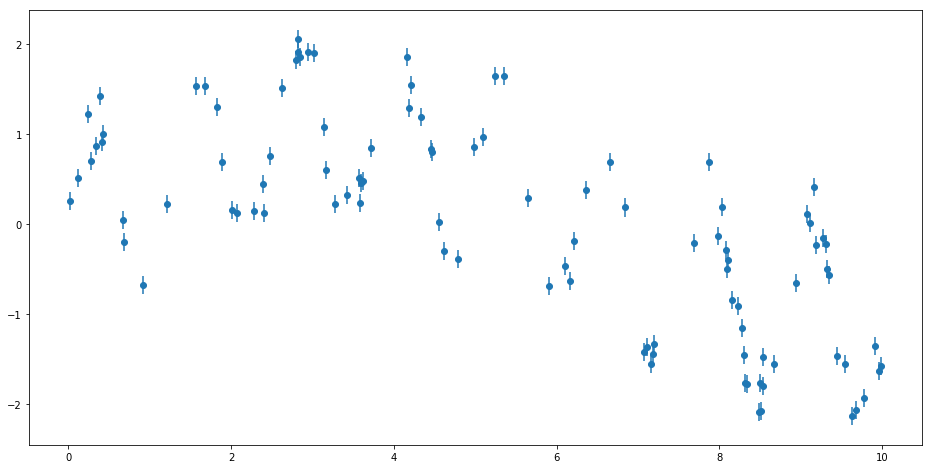

In [0]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    """大きな波＋小さな波＋ノイズからなるダミーデータ。"""
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# xからyを計算
y = sin_model(x)

# Plotしてみる。
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

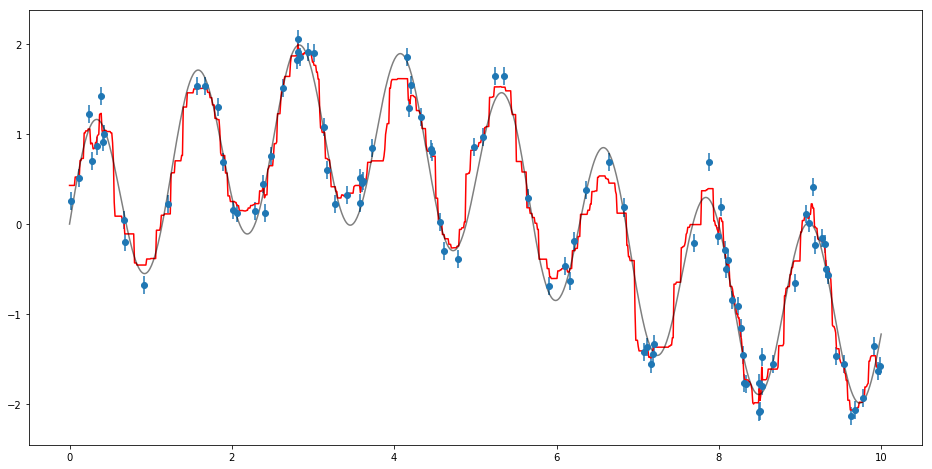

In [0]:
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト回帰用

# 確認用に0〜10の1000個のデータを用意
xfit = np.linspace(0, 10, 1000)       #0〜10まで1000個

# ランダムフォレスト実行
rfr = RandomForestRegressor(100)  # インスタンスの生成　木の数を100個に指定
rfr.fit(x[:, None], y)            # 学習実行
yfit = rfr.predict(xfit[:, None]) # 予測実行

# 結果比較用に実際の値を取得。
ytrue = sin_model(xfit,0) # xfitを波発生関数に食わせて、その結果を取得

# 結果確認
plt.figure(figsize = (16,8))
plt.errorbar(x, y, 0.1, fmt='o')
plt.plot(xfit, yfit, '-r')                # 予測値のplot
plt.plot(xfit, ytrue, '-k', alpha = 0.5)  # 正解値のplot